# Очистка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

### Обработка отсутствующих данных

In [2]:
data_titanic = pd.read_csv("D:\\My Jupyter Notebook\\Datasets\\train.csv")  # тот самый титаничекий датасет
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
series_age = data_titanic['Age']
series_age is data_titanic['Age']

True

In [5]:
series_age.isna().sum()  # булевая маска, для проверки, является ли значение отсутствующим

177

In [6]:
series_age.notna()  # является ли НЕ отстуствующим (наоборот)

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

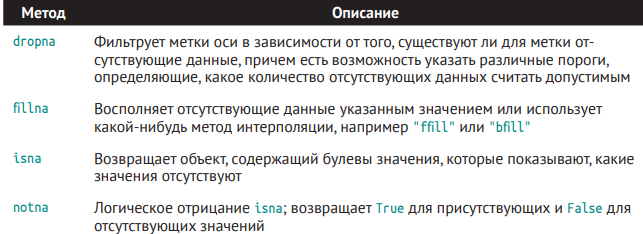

In [7]:
data_titanic[series_age.isna()]  # датафрейм с пропущенным Age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
data_titanic.dropna() # параметр thresh определяет порог отсуствующих значений для удаления из фрейма

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#### Восполнение отсутствующих данных

In [9]:
data_titanic[series_age.isna()].fillna('ЧТО-ТО')  # заполнить NaN чем-либо

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,ЧТО-ТО,0,0,330877,8.4583,ЧТО-ТО,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,ЧТО-ТО,0,0,244373,13.0000,ЧТО-ТО,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,ЧТО-ТО,0,0,2649,7.2250,ЧТО-ТО,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,ЧТО-ТО,0,0,2631,7.2250,ЧТО-ТО,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,ЧТО-ТО,0,0,330959,7.8792,ЧТО-ТО,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,ЧТО-ТО,0,0,2629,7.2292,ЧТО-ТО,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,ЧТО-ТО,8,2,CA. 2343,69.5500,ЧТО-ТО,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,ЧТО-ТО,0,0,345777,9.5000,ЧТО-ТО,S
878,879,0,3,"Laleff, Mr. Kristo",male,ЧТО-ТО,0,0,349217,7.8958,ЧТО-ТО,S


- Если передать методу fillna словарь, то можно будет подставлять вместо отсутствующих данных значение, зависящее от столбца

In [10]:
data_titanic.fillna({'Cabin':'неизвестна', 'Age':'неизвестен'})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,неизвестна,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,неизвестна,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,неизвестна,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,неизвестна,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,неизвестен,1,2,W./C. 6607,23.4500,неизвестна,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


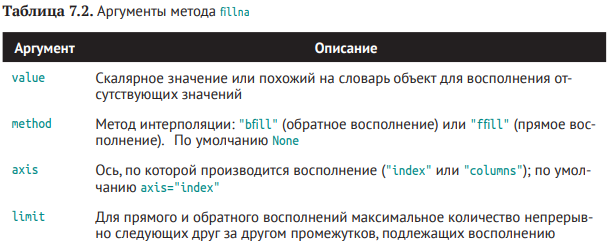

## Фильтрация отсутствующих данных

##  Преобразование данных

#### Устранение дубликатов

In [11]:
data_class = pd.DataFrame({'name':['bob','stas','leon','leon','stas'],'age':[20, 17,21,21,17], 'math':[4,5,3,3,5],'eng':[3,4,5,5,3]})
data_class = data_class.set_index('name')
data_class

,age,math,eng
name,,,
bob,20,4,3
stas,17,5,4
leon,21,3,5
leon,21,3,5
stas,17,5,3


In [12]:
# булева маска дубликатов
data_class.duplicated()  # параметр keep определяет что считать оригиналом (первое или последнее вхождение)

name
bob     False
stas    False
leon    False
leon     True
stas    False
dtype: bool

In [13]:
data_class.drop_duplicates()  # полностью совпадающая строка убирается

,age,math,eng
name,,,
bob,20,4,3
stas,17,5,4
leon,21,3,5
stas,17,5,3


###  Преобразование данных с помощью функции или отображения

In [14]:
dict_footbal = {'name':['messi','ronaldo','neymar','ibra','mbappe','ramos','alba','modric','xavi', 'de_bruyne', 'haaland'], 'speed':[7,8,9,6,10,6,7,7,7,7,9],'shoot':[10,9,7,7,8,7,6,8,7,8,8],'dribbling':[10,7,9,7,8,5,6,7,8,7,6],'pas':[10,6,8,7,7,7,8,9,9,10,6],'phy':[7,9,6,8,7,7,6,7,6,7,10],'def':[6,5,5,6,4,9,7,7,8,7,5]}

data_footbal = pd.DataFrame(dict_footbal)
data_footbal = data_footbal.set_index('name')
data_footbal

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,7,10,10,10,7,6
ronaldo,8,9,7,6,9,5
neymar,9,7,9,8,6,5
ibra,6,7,7,7,8,6
mbappe,10,8,8,7,7,4
ramos,6,7,5,7,7,9
alba,7,6,6,8,6,7
modric,7,8,7,9,7,7
xavi,7,7,8,9,6,8


In [15]:
# добавим новый столбец, отобразив функцию на один из столбцов
def func_rating(x):
    return int((x/6)*10 + 8.5)
data_footbal['rating'] = data_footbal.iloc[:,:].sum(axis=1).map(func_rating)
data_footbal

,speed,shoot,dribbling,pas,phy,def,rating
name,,,,,,,
messi,7,10,10,10,7,6,91
ronaldo,8,9,7,6,9,5,81
neymar,9,7,9,8,6,5,81
ibra,6,7,7,7,8,6,76
mbappe,10,8,8,7,7,4,81
ramos,6,7,5,7,7,9,76
alba,7,6,6,8,6,7,75
modric,7,8,7,9,7,7,83
xavi,7,7,8,9,6,8,83


In [16]:
data_class

,age,math,eng
name,,,
bob,20,4,3
stas,17,5,4
leon,21,3,5
leon,21,3,5
stas,17,5,3


## Замена значений

In [17]:
data_footbal.replace(10,9) # замена значений (можно для конкретики передать словарь)

,speed,shoot,dribbling,pas,phy,def,rating
name,,,,,,,
messi,7,9,9,9,7,6,91
ronaldo,8,9,7,6,9,5,81
neymar,9,7,9,8,6,5,81
ibra,6,7,7,7,8,6,76
mbappe,9,8,8,7,7,4,81
ramos,6,7,5,7,7,9,76
alba,7,6,6,8,6,7,75
modric,7,8,7,9,7,7,83
xavi,7,7,8,9,6,8,83


## Переименование индексов осей

In [18]:
data_footbal.index  # массив индексов

Index(['messi', 'ronaldo', 'neymar', 'ibra', 'mbappe', 'ramos', 'alba',
       'modric', 'xavi', 'de_bruyne', 'haaland'],
      dtype='object', name='name')

In [19]:
# data_footbal.index = [...] можно задать новый список индексов вместо старого
data_footbal.index = data_footbal.index.map(str.upper)
data_footbal

,speed,shoot,dribbling,pas,phy,def,rating
name,,,,,,,
MESSI,7,10,10,10,7,6,91
RONALDO,8,9,7,6,9,5,81
NEYMAR,9,7,9,8,6,5,81
IBRA,6,7,7,7,8,6,76
MBAPPE,10,8,8,7,7,4,81
RAMOS,6,7,5,7,7,9,76
ALBA,7,6,6,8,6,7,75
MODRIC,7,8,7,9,7,7,83
XAVI,7,7,8,9,6,8,83


In [20]:
# Если требуется создать преобразованный вариант набора данных, 
# не меняя  оригинал, то будет полезен метод rename
data_footbal.rename(index=str.title, columns=str.upper) # можно использовать для конкретики словарь

,SPEED,SHOOT,DRIBBLING,PAS,PHY,DEF,RATING
name,,,,,,,
Messi,7,10,10,10,7,6,91
Ronaldo,8,9,7,6,9,5,81
Neymar,9,7,9,8,6,5,81
Ibra,6,7,7,7,8,6,76
Mbappe,10,8,8,7,7,4,81
Ramos,6,7,5,7,7,9,76
Alba,7,6,6,8,6,7,75
Modric,7,8,7,9,7,7,83
Xavi,7,7,8,9,6,8,83


### Дискретизация и группировка по интервалам

In [21]:
age = np.random.randint(1,19,size=50) # предположим есть массив разных возрастов
age

array([10, 11, 15,  6, 13,  9,  1, 13,  9,  6, 16,  2,  9,  9,  6, 14, 12,
       13,  2, 17, 11, 13, 10, 12,  7,  8, 10, 14,  3, 10,  9, 15, 10,  9,
        2, 17,  3,  7,  6, 14,  1, 12, 10, 18, 16,  9,  4, 15, 15,  2])

In [22]:
# разобьём множество возрастов на определенные интервалы с помощью pd.cut()
age_intervals = pd.cut(age,[1,6,12,16,19],right=False) # ,right=False - правый конец невключительно

age_intervals  # специальный объект Categorical

[[6, 12), [6, 12), [12, 16), [6, 12), [12, 16), ..., [6, 12), [1, 6), [12, 16), [12, 16), [1, 6)]
Length: 50
Categories (4, interval[int64, left]): [[1, 6) < [6, 12) < [12, 16) < [16, 19)]

In [23]:
# задать имена интервалов
age_intervals = pd.cut(age,bins=[0,6,14,18], labels=['младенцы','дети','подростки'],right=False)
age_intervals

['дети', 'дети', 'подростки', 'дети', 'дети', ..., 'дети', 'младенцы', 'подростки', 'подростки', 'младенцы']
Length: 50
Categories (3, object): ['младенцы' < 'дети' < 'подростки']

In [24]:
print(*age)

10 11 15 6 13 9 1 13 9 6 16 2 9 9 6 14 12 13 2 17 11 13 10 12 7 8 10 14 3 10 9 15 10 9 2 17 3 7 6 14 1 12 10 18 16 9 4 15 15 2


In [25]:
# или разбить на равные части по заданному кол-ву интервалов
age_intervals = pd.cut(age,2)
age_intervals.value_counts()

(0.983, 9.5]    23
(9.5, 18.0]     27
dtype: int64

In [26]:
(age.max() + age.min()) / 2

9.5

In [27]:
# pd.qcut() аналогично разбивает на интервалы, но по квантилям 
age_intervals = pd.qcut(age,3)
age_intervals.value_counts()  # более точные отрезки

(0.999, 9.0]    23
(9.0, 12.0]     11
(12.0, 18.0]    16
dtype: int64

In [28]:
pd.Series(age_intervals)  # можно преобразовать в серию

0      (9.0, 12.0]
1      (9.0, 12.0]
2     (12.0, 18.0]
3     (0.999, 9.0]
4     (12.0, 18.0]
5     (0.999, 9.0]
6     (0.999, 9.0]
7     (12.0, 18.0]
8     (0.999, 9.0]
9     (0.999, 9.0]
10    (12.0, 18.0]
11    (0.999, 9.0]
12    (0.999, 9.0]
13    (0.999, 9.0]
14    (0.999, 9.0]
15    (12.0, 18.0]
16     (9.0, 12.0]
17    (12.0, 18.0]
18    (0.999, 9.0]
19    (12.0, 18.0]
20     (9.0, 12.0]
21    (12.0, 18.0]
22     (9.0, 12.0]
23     (9.0, 12.0]
24    (0.999, 9.0]
25    (0.999, 9.0]
26     (9.0, 12.0]
27    (12.0, 18.0]
28    (0.999, 9.0]
29     (9.0, 12.0]
30    (0.999, 9.0]
31    (12.0, 18.0]
32     (9.0, 12.0]
33    (0.999, 9.0]
34    (0.999, 9.0]
35    (12.0, 18.0]
36    (0.999, 9.0]
37    (0.999, 9.0]
38    (0.999, 9.0]
39    (12.0, 18.0]
40    (0.999, 9.0]
41     (9.0, 12.0]
42     (9.0, 12.0]
43    (12.0, 18.0]
44    (12.0, 18.0]
45    (0.999, 9.0]
46    (0.999, 9.0]
47    (12.0, 18.0]
48    (12.0, 18.0]
49    (0.999, 9.0]
dtype: category
Categories (3, interval[float64, r

In [29]:
# минизадание: сделать новые колонки в датафрейме (интервалы по возрасту)
data = data_titanic.loc[:,['Sex','Age','Survived']]

In [30]:
data = data.dropna()
data

,Sex,Age,Survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0
...,...,...,...
885,female,39.0,0
886,male,27.0,0
887,female,19.0,1
889,male,26.0,1


In [33]:
# зададим интервалы возраста малыши,дети,молодёжь,зрелые,старики
intervals_age = pd.cut(data['Age'],[0,6,18,35,55,100],labels=['малыши','дети','молодёжь','зрелые','старики'])
intervals_age.value_counts()

молодёжь    358
зрелые      177
дети         92
малыши       47
старики      40
Name: Age, dtype: int64

In [34]:
data['age_category'] = intervals_age
data

,Sex,Age,Survived,age_category
0,male,22.0,0,молодёжь
1,female,38.0,1,зрелые
2,female,26.0,1,молодёжь
3,female,35.0,1,молодёжь
4,male,35.0,0,молодёжь
...,...,...,...,...
885,female,39.0,0,зрелые
886,male,27.0,0,молодёжь
887,female,19.0,1,молодёжь
889,male,26.0,1,молодёжь


## Обнаружение и фильтрация выбросов

<Axes: ylabel='Frequency'>

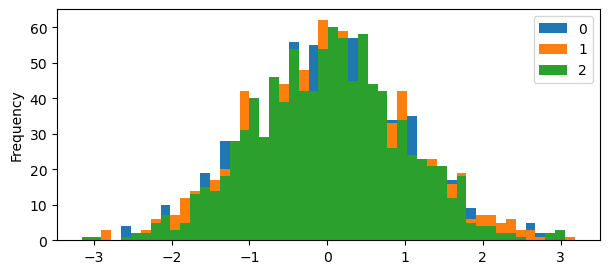

In [35]:
# предположим, есть массив с нормальным распределением
different_numbers = np.random.standard_normal((1000,3))
df = pd.DataFrame(different_numbers)
df.plot(kind='hist',bins=50,figsize=(7,3))  # распределение нормальное, всё ходит вокруг 0

In [36]:
# есть "выбросы", с которыми нужно бороться
df.describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,0.005913,0.028982,0.007137
std,0.985092,1.005918,0.950277
min,-2.990936,-2.882102,-3.156037
25%,-0.617168,-0.637838,-0.653726
50%,0.006321,0.019416,0.035564
75%,0.638775,0.690240,0.632570
max,2.820103,3.184344,3.009181


In [37]:
mask = df.abs() > 3
df[mask.any(axis=1)] # выбросы

,0,1,2
109,0.489133,1.074568,-3.156037
149,-0.113645,3.023050,1.036744
166,0.274885,0.004366,3.009181
302,0.459999,-0.170740,-3.019082
570,0.223806,3.184344,0.295319
883,0.821075,0.167196,3.004292


In [38]:
mask

,0,1,2
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [39]:
df[mask] = np.sign(df) * 3  # все "выбросы" урезаются до -3 и 3 в зависимости от знака
df.describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,0.005913,0.028775,0.007299
std,0.985092,1.005288,0.949666
min,-2.990936,-2.882102,-3.000000
25%,-0.617168,-0.637838,-0.653726
50%,0.006321,0.019416,0.035564
75%,0.638775,0.690240,0.632570
max,2.820103,3.000000,3.000000


## Перестановки и случайная выборка

In [40]:
# переставление элементов
numbers = np.random.permutation(10)  # случайная перестановка заданных элементов
print(numbers)

data_footbal.take(numbers,axis=0) # используем take чтобы взять фрейм в случайном порядке

[5 6 1 8 2 9 4 3 7 0]


,speed,shoot,dribbling,pas,phy,def,rating
name,,,,,,,
RAMOS,6,7,5,7,7,9,76
ALBA,7,6,6,8,6,7,75
RONALDO,8,9,7,6,9,5,81
XAVI,7,7,8,9,6,8,83
NEYMAR,9,7,9,8,6,5,81
DE_BRUYNE,7,8,7,10,7,7,85
MBAPPE,10,8,8,7,7,4,81
IBRA,6,7,7,7,8,6,76
MODRIC,7,8,7,9,7,7,83


In [42]:
# Чтобы выбрать случайное подмножество без возвращения, можно использовать метод sample объектов Series и DataFrame
data_footbal.sample(3) # случайные 3 

,speed,shoot,dribbling,pas,phy,def,rating
name,,,,,,,
NEYMAR,9,7,9,8,6,5,81
HAALAND,9,8,6,6,10,5,81
RONALDO,8,9,7,6,9,5,81


In [43]:
# с повторениями replace=True
data_footbal.sample(10,replace=True)

,speed,shoot,dribbling,pas,phy,def,rating
name,,,,,,,
MESSI,7,10,10,10,7,6,91
MESSI,7,10,10,10,7,6,91
MODRIC,7,8,7,9,7,7,83
MESSI,7,10,10,10,7,6,91
HAALAND,9,8,6,6,10,5,81
DE_BRUYNE,7,8,7,10,7,7,85
RAMOS,6,7,5,7,7,9,76
HAALAND,9,8,6,6,10,5,81
HAALAND,9,8,6,6,10,5,81


## Вычисление индикаторных переменных

- Если в столбце объекта DataFrame встречается k различных значений, то можно построить матрицу или объект DataFrame с k столбцами, содержащими только нули и единицы.
- pd.get_dummies( )

In [44]:
data2 = data_titanic.loc[:,['Survived','Age','Sex','Embarked']]
data2
# минизадание: сделать более "удобную" таблицу

,Survived,Age,Sex,Embarked
0,0,22.0,male,S
1,1,38.0,female,C
2,1,26.0,female,S
3,1,35.0,female,S
4,0,35.0,male,S
...,...,...,...,...
886,0,27.0,male,S
887,1,19.0,female,S
888,0,NaN,female,S
889,1,26.0,male,C


In [45]:
# сначала сделаем индикаторные переменные вместо категориальных Sex, Embarked
sex_dummies = pd.get_dummies(data2['Sex'])
sex_dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
embarked_dummies = pd.get_dummies(data2['Embarked'],prefix='city') # используем prefix='..' чтобы было понятнее
embarked_dummies

In [ ]:
# добавим эти переменные в датафрейм 

data3 = data2[['Survived']].join(sex_dummies) # джойним нужные фреймы 
data3 = data3.join(embarked_dummies)

data3

In [ ]:
# можно было бы сделать всё и сразу на месте
data4 = pd.get_dummies(data2,columns=['Sex','Embarked'])
data4

In [ ]:
data3
# осталось разобраться в возрастом

In [ ]:
data2[['Age']] # с помощью pd.cut()  поделим его на категории, потом сделаем индикаторные переменные

In [ ]:
age_category = pd.cut(data2['Age'],[0,18,35,55,100],labels=['0-18','18-35','35-55','55+']) # разобьём на интервалы
age_category.value_counts()

In [ ]:
age_dummies = pd.get_dummies(age_category)  # фрейм из индикаторных переменных
age_dummies

In [ ]:
# присоединяем последний фрейм
data3 = data3.join(age_dummies)

data3 # ура! мы сделали данные чуть-чуть удобнее!

# !!! у нас исчезли NaN, теперь они фиктивно числятся как [0,0,0,0] - ни туда, ни сюда